# **Project Protfolio - Insurance Cost Prediction**

# **MODEL BUILDING**

## **Importing Libraries**

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [ ]:
#Downloading the Dataset
!gdown "https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS"

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 45.5MB/s]


In [ ]:
# read the dataset
df = pd.read_csv('insurance.csv')

In [ ]:
#Print the first 5 rows of the dataset

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
#Shape of the dataset

df.shape

(986, 11)

In [ ]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [ ]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
df.duplicated().sum()

0

## **Regression Analysis**

In [ ]:
#Import Required Libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#splitting Independent Variables and depentent variable(Target)
X = df.drop('PremiumPrice', axis = 1)
y = df['PremiumPrice']

In [ ]:
#Let's check the shape of the X and y

X.shape, y.shape

((986, 10), (986,))

### **Ordinary Least Squares (OLS) Regression model**

In [ ]:
#Lets see the OLS Regression Model to analysis the dataset

#Add a Constant for the Intercept
X_sm = sm.add_constant(X)

#Fit the model
model = sm.OLS(y, X_sm).fit()

#print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Thu, 13 Feb 2025   Prob (F-statistic):          3.92e-210
Time:                        16:49:01   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

**INFENRNCE:**

- This is the summary of an **Ordinary Least Squares (OLS) regression model** where the dependent variable is `PremiumPrice`, and the independent variables include various factors such as `Age`, `Diabetes`, `AnyTransplants`, etc. Let’s analyze the results:


### **Key Metrics:**
1. **R-squared (0.643)**:
   - This means that **64.3%** of the variability in `PremiumPrice` is explained by the independent variables in the model.
   - While it's **not perfect**, it's a decent fit, especially for a regression model involving human or medical data.

2. **Adj. R-squared (0.639)**:
   - Adjusted R-squared accounts for the number of predictors and is **slightly lower**. It indicates that adding irrelevant predictors isn't inflating the explained variance much.

3. **F-statistic (175.5, p-value = 3.92e-210)**:
   - The F-statistic tests the overall significance of the model.
   - The extremely small p-value indicates the model as a whole is statistically significant.



### **Insights:**

1. **Age, Chronic Diseases, Transplants, Weight, and Family History of Cancer** are the most impactful factors affecting premium prices.

2. Some variables, like `Height` and `BloodPressureProblems`, are **insignificant** and **might be removed** to simplify the model.

3. **Multicollinearity** (high condition number) may be affecting reliability. Consider using Variance Inflation Factor (**VIF**) analysis to identify and **address multicollinearity**.

4. The **non-normality of residuals** suggests further diagnostic checks and adjustments may be needed for better model reliability.

### **Recommendations:**
- **Remove or re-examine** insignificant predictors to **improve model interpretability**.

- **Address multicollinearity** by **identifying correlated variables** and using **regularization** techniques like **Ridge** or **Lasso** regression if needed.

- **Address residual normality** using transformations or a more robust model.

### **Conclusion:**

1. **R-squared (0.643)**: The model explains **64.3%** of the variance in premium prices.  

2. **Adjusted R-squared (0.639)**: **Slightly lower**, indicating most features contribute meaningfully.  

3. **Model Significance**: F-statistic (**175.5, p < 0.001**) shows the model is statistically significant.  

4. **Scope for Improvement**: Additional features could **improve the unexplained 35.7% variance**.

### **Evalution Metrics Function**

In [ ]:
#Let's Create a Function to get the Evalution Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
def evaluate_model_performance(y_true, y_forecast, model):

    # Calculate MSE
    mse = mean_squared_error(y_true, y_forecast)

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_forecast)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate R-squared
    r2 = r2_score(y_true, y_forecast)

    # Number of observations
    n = len(y_true)

    # Number of predictors (features)
    p = model.n_features_in_

    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Return all metrics in a dictionary
    return print(f"MSE: {round(mse, 4)}\nMAE: {round(mae, 4)}\nRMSE: {round(rmse, 4)}\nR-squared: {round(r2, 4)}\nAdjusted R-squared: {round(adjusted_r2, 4)}")

## **Base Model of Linear Regression (without Scaling)**

In [ ]:
#Split the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Predict the model
ypred = lr_model.predict(X_test)
ypred_train = lr_model.predict(X_train)

#Evalute the model
print('Coefficients :', lr_model.coef_)
print('Intercepts :', lr_model.intercept_)
print('Mean Squared Error :', mean_squared_error(y_test, ypred))
print('R-Squared :', r2_score(y_test, ypred))

Coefficients : [ 3.25506423e+02 -3.96349602e+02  1.58110629e+02  7.48956767e+03
  2.54753510e+03 -3.89192769e+00  6.95446175e+01  1.95117272e+02
  2.11982109e+03 -7.00874830e+02]
Intercepts : 5381.50505918383
Mean Squared Error : 12221661.705858212
R-Squared : 0.7133944270278739


In [ ]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1), columns = X.columns)
lr_model_weights['Intercept'] = lr_model.intercept_
lr_model_weights

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Intercept
0,325.506423,-396.349602,158.110629,7489.567668,2547.535105,-3.891928,69.544618,195.117272,2119.821089,-700.87483,5381.505059


**INFERENCE:**

1. **Coefficients Insight**: Variables like `AnyTransplants` (7489.57) and `AnyChronicDiseases` (2547.53) have **strong positive impacts on the premium price**, while `NumberOfMajorSurgeries` (-700.87) **negatively impacts** it.  

2. **Intercept**: The **base premium** price, without any influencing factors, starts at **5381.51**.

3. **Mean Squared Error (MSE)**: The **MSE value** of **12,221,661.71** indicates the average squared difference between predicted and actual premium prices.

4. **R-squared (0.713)**: The model explains **71.3% variance** in the premium price, indicating a **reasonable fit**. However, the model could be **improved further**, and data should be analyzed **after standardization** for **better performance** and **accuracy**.

5. **Scope for Improvement**: With **28.7% variance unexplained**, there’s room for refining the model with additional or more significant features.

In [ ]:
print("Performance of Train Data")
print("-" * 30)
y_train_pred = lr_model.predict(X_train)  # Ensure you predict using X_train
evaluate_model_performance(y_train, y_train_pred, lr_model)

print("\nPerformance of Test Data")
print("-" * 30)
y_test_pred = lr_model.predict(X_test)  # Predict using X_test for test evaluation
evaluate_model_performance(y_test, y_test_pred, lr_model)


Performance of Train Data
------------------------------
MSE: 14390317.7103
MAE: 2692.4717
RMSE: 3793.4572
R-squared: 0.6219
Adjusted R-squared: 0.6171

Performance of Test Data
------------------------------
MSE: 12221661.7059
MAE: 2586.2254
RMSE: 3495.9493
R-squared: 0.7134
Adjusted R-squared: 0.6981


**INFERENCE:**

- The **Linear Regression** base model exhibits a **training R² score** of **62.1%** and a **test R² score** of **71.3%**. Additionally, the **Adjusted R² score** is **61.7%** for the **training data** and **69.8%** for the **test data**, suggesting the presence of **High Variance** and **High Bias**.

- To address this, we should consider **improving the model using regularization** techniques or evaluating its performance through **K-fold cross-validation**.

## **Linear Regression Model After Scaling**

**TRAIN-TEST SPLIT**

In [ ]:
#Split the data into Train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (788, 10)
X_test shape: (198, 10)
y_train shape: (788,)
y_test shape: (198,)


**STANDARDIZE THE DATASET**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Train data is fit and transform
X_test_scaled = scaler.transform(X_test) # Test data is transform only because of no data leakage on test data

In [ ]:
X_train_scaled

array([[-1.61753552, -0.85771955, -0.92891558, ..., -0.52448156,
        -0.35908192, -0.87479875],
       [-0.76394905, -0.85771955,  1.07652409, ..., -0.52448156,
        -0.35908192, -0.87479875],
       [ 1.15662049,  1.16588226, -0.92891558, ..., -0.52448156,
        -0.35908192, -0.87479875],
       ...,
       [ 1.37001711,  1.16588226, -0.92891558, ..., -0.52448156,
        -0.35908192,  3.04934594],
       [-0.33715582,  1.16588226, -0.92891558, ...,  1.90664473,
         2.78487981,  0.43324948],
       [ 1.2277527 ,  1.16588226,  1.07652409, ..., -0.52448156,
         2.78487981,  0.43324948]])

In [ ]:
X_train_scaled.shape

(788, 10)

In [ ]:
# Lets convert the X_train_scaled list of array into a DataFrame
df_X_train = pd.DataFrame(X_train_scaled, columns = X.columns)
df_X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249


In [ ]:
X_test_scaled

array([[ 0.58756285, -0.85771955, -0.92891558, ...,  1.90664473,
         2.78487981,  0.43324948],
       [-0.19489141, -0.85771955, -0.92891558, ...,  1.90664473,
         2.78487981,  0.43324948],
       [ 1.65454593,  1.16588226,  1.07652409, ..., -0.52448156,
        -0.35908192, -0.87479875],
       ...,
       [-1.54640331, -0.85771955, -0.92891558, ..., -0.52448156,
        -0.35908192, -0.87479875],
       [ 0.58756285,  1.16588226,  1.07652409, ..., -0.52448156,
        -0.35908192,  1.74129771],
       [-1.04847788,  1.16588226, -0.92891558, ..., -0.52448156,
        -0.35908192, -0.87479875]])

In [ ]:
X_test_scaled.shape

(198, 10)

In [ ]:
# Lets convert the X_test_scaled list of array into a DataFrame
df_X_test = pd.DataFrame(X_test_scaled, columns = X.columns)
df_X_test.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,0.587563,-0.857720,-0.928916,-0.243187,-0.470856,-0.321241,0.484040,1.906645,2.784880,0.433249
1,-0.194891,-0.857720,-0.928916,-0.243187,2.123791,1.676690,-0.275768,1.906645,2.784880,0.433249
2,1.654546,1.165882,1.076524,-0.243187,-0.470856,-0.321241,0.691260,-0.524482,-0.359082,-0.874799
3,-0.906213,-0.857720,-0.928916,-0.243187,-0.470856,1.077311,-0.482988,-0.524482,2.784880,0.433249
4,0.445298,1.165882,1.076524,-0.243187,-0.470856,0.278138,0.484040,1.906645,-0.359082,-0.874799


### **MODEL BUILDING**

- **Build** the **Linear Regression** **model** and analyze the model statistics.
- **Display** the model **coefficients** along with the corresponding column names.
- **Experiment** with **Ridge** and **Lasso** Regression.

In [ ]:
from sklearn.linear_model import LinearRegression

lr_reg_model = LinearRegression()
lr_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predicting values for the training and test data

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Check the r2 score on trian data:

r2_train = r2_score(y_train, y_train_pred)
print(f'R2 Score on Train Data: {r2_train}')

R2 Score on Train Data: -10.2685815593652


In [ ]:
# Check the r2 score on test data:

r2_test = r2_score(y_test, y_test_pred)
print(f'R2 Score on Test Data: {r2_test}')

R2 Score on Test Data: -9.114251836057319


In [ ]:
# Performance of Linear Regression with scaling
print("Performance of Linear Regression with scaling")
print("-"*50)
# Metrix for train and test data
print("Performance of Train data")
print("-"*30)
evaluate_model_performance(y_train, y_train_pred, lr_reg_model)
print()
print("Performance of Test data")
print("-"*30)
evaluate_model_performance(y_test, y_test_pred, lr_reg_model)

Performance of Linear Regression with scaling
--------------------------------------------------
Performance of Train data
------------------------------
MSE: 428906302.4157
MAE: 19579.3637
RMSE: 20710.0532
R-squared: -10.2686
Adjusted R-squared: -10.4136

Performance of Test data
------------------------------
MSE: 431299932.7482
MAE: 19670.7845
RMSE: 20767.7619
R-squared: -9.1143
Adjusted R-squared: -9.6551


**INFERENCE:**

- After standardizing the data (scaling both train and test sets), the **R² and Adjusted R² scores turned negative**, indicating a **poorly performing model**.

- This suggests that **scaling is not suitable** for this case. Instead, consider the **unscaled base model** and focus on improving it using **regularization techniques** and **K-fold cross-validation**.

## **K-Fold Cross Validation on Linear Regression**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, make_scorer
import numpy as np

#splitting Independent Variables and depentent variable(Target)
X = df.drop('PremiumPrice', axis = 1)
y = df['PremiumPrice']

# Initialize KFold and model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Perform cross-validation
scoring = make_scorer(r2_score)  # Using R² as the metric
scores = cross_val_score(model, X, y, scoring=scoring, cv=kf)

# Results
print("R² scores for each fold:", scores)
print("Average R² score:", np.mean(scores))


R² scores for each fold: [0.71339443 0.62788598 0.58858837 0.45124895 0.702397  ]
Average R² score: 0.6167029451464101


**INFERENCE:**

The **R² scores for each fold** show variability in the model's performance across the different splits:  

- The scores range from **0.451** to **0.713**, indicating that the model performs well on some folds but struggles on others.
- The **average R² score of 0.617** suggests that the model explains approximately **61.7% of the variance** in the target variable across all folds.

### **Key Insights:**
1. **Variability Across Folds**: The **difference in R² scores** indicates that the **model's performance is inconsistent** and may depend on the specific data in each fold.

2. **Moderate Fit**: With an **average R² score** of **0.617**, the model shows a **reasonable but not excellent fit**. Improvements could be made to enhance performance consistency.

3. **Next Steps**: Consider applying **regularization techniques** (e.g., **Ridge or Lasso**) or feature engineering to reduce variability and **improve the model's** predictive power.

## **Regularization**

- **Regularization** in the context of machine learning and statistical modeling refers to techniques used to **prevent overfitting and improve the generalization** of models.

- Regularization techniques **add a penalty to the loss function** during training to discourage complex models that may fit the training data too closely, thereby reducing their ability to generalize to new, unseen data.

- The Two most common regularization techniques are:

     1.   **Lasso Regression** (L1 Regularization)

     2.   **Ridge Regression** (L2 Regularization)

- And also we have one more Regularization which both combined

    3.   **ElasticNet Regression** (L1 + L2 Regularization)


In [ ]:
# Create a Function to calculate Adjusted R2 Score
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

### **LASSO Regression - L1 Regularization**

In [ ]:
# Hyperparameter Tuning - Lasso Regression

from sklearn.linear_model import Lasso

train_scores =[]
test_scores = []

lambda_list = np.linspace(0,0.00000000000000000000000000000000000000000000000000000000000000001,50)

for rate in lambda_list:
  lasso_model = Lasso(alpha = rate)
  lasso_model.fit(X_train, y_train)

  train_score = adj_r(lasso_model.score(X_train, y_train), X_train, y_train)
  test_score = adj_r(lasso_model.score(X_test, y_test), X_test, y_test)

  train_scores.append(train_score)
  test_scores.append(test_score)

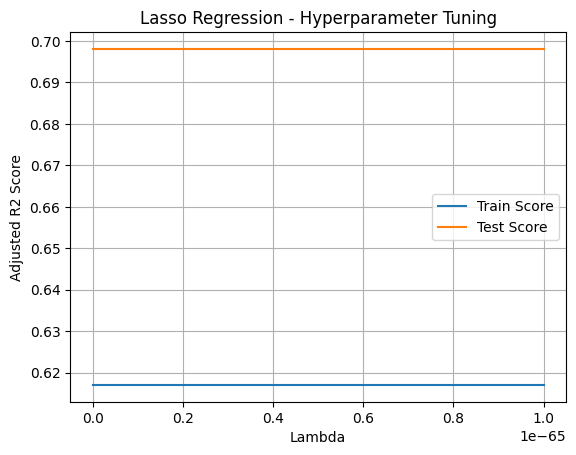

In [ ]:
# Hyperparameter tuning graph to find best lambda using Lasso Regression
plt.figure()
plt.plot(lambda_list, train_scores, label = 'Train Score')
plt.plot(lambda_list, test_scores, label = 'Test Score')
plt.title('Lasso Regression - Hyperparameter Tuning')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 Score')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# to find the index of maximum performance with respect to lambda

np.argmax(test_scores)

0

In [ ]:
# to find the lambda value at which the performance is maximum

lambda_list[0]

0.0

**INFERENCE:**

- When the regularization parameter(λ) in Lasso regression is **Very very low, nearly 0.0 x 10^-65**
 , it effectively means that the **regularization term has almost No impact on the model**.
- This scenario makes the **Lasso regression model behave almost like a standard linear regression model without regularization.**

- Thus, the **Lasso Regression model is overfitted**, but we consider our **lambda = 0.0** and proceed with further analysis.

In [ ]:
lasso_model = Lasso(alpha = 0.0)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0)

In [ ]:
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

In [ ]:
lasso_model_weights = pd.DataFrame(lasso_model.coef_.reshape(1,-1), columns = df.columns[:-1])
lasso_model_weights['Intercept'] = lasso_model.intercept_
lasso_model_weights

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Intercept
0,325.506423,-396.349602,158.110629,7489.567668,2547.535105,-3.891928,69.544618,195.117272,2119.821089,-700.87483,5381.505059


In [ ]:
# Accuracy Score for Lasso Regression
print('\n\nLasso Regression of Training Accuracy\n')
evaluate_model_performance(y_train.values, y_pred_train_lasso, lasso_model)
print('---'* 25)
print('\n\nLasso Regression of Test Accuracy\n')
evaluate_model_performance(y_test.values, y_pred_test_lasso, lasso_model)




Lasso Regression of Training Accuracy

MSE: 14390317.7103
MAE: 2692.4717
RMSE: 3793.4572
R-squared: 0.6219
Adjusted R-squared: 0.6171
---------------------------------------------------------------------------


Lasso Regression of Test Accuracy

MSE: 12221661.7059
MAE: 2586.2254
RMSE: 3495.9493
R-squared: 0.7134
Adjusted R-squared: 0.6981


**INFERENCE:**

 - It is evident that applying **Lasso Regularization did not result in any improvement**, as its **performance remains** **identical** to that of the **base Linear Regression model**.

### **Ridge Regression - L2 Regularization**

In [ ]:
# Hyperparameter Tuning - Ridge Regression

from sklearn.linear_model import Ridge
train_scores =[]
test_scores = []

lambda_list = np.linspace(0,0.00000000000000000000000000000000000000000000000000000000000000001,50)

for rate in lambda_list:
  ridge_model = Ridge(alpha = rate)
  ridge_model.fit(X_train, y_train)

  train_score = adj_r(ridge_model.score(X_train, y_train), X_train, y_train)
  test_score = adj_r(ridge_model.score(X_test, y_test), X_test, y_test)

  train_scores.append(train_score)
  test_scores.append(test_score)


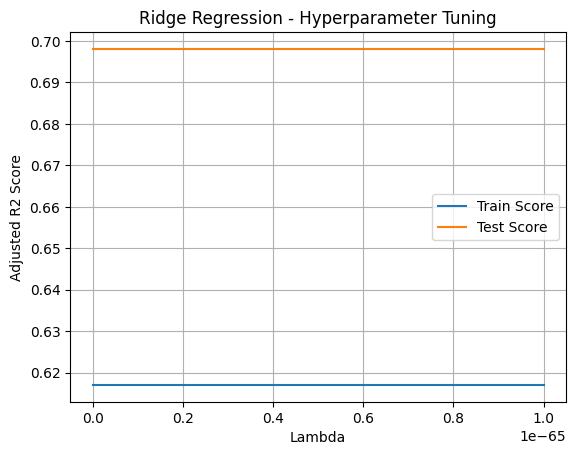

In [ ]:
# Hyperparameter tuning graph to find best lambda using Ridge Regression
plt.figure()
plt.plot(lambda_list, train_scores, label = 'Train Score')
plt.plot(lambda_list, test_scores, label = 'Test Score')
plt.title('Ridge Regression - Hyperparameter Tuning')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 Score')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# to find the index of maximum performance with respect to lambda

np.argmax(test_scores)

0

In [ ]:
# to find the lambda value at which the performance is maximum

lambda_list[0]

0.0

**INFERENCE:**

- When the regularization parameter(λ) in Ridge regression is **Very very low, nearly 0.0 x 10^-65**
 , it effectively means that the **regularization term has almost No impact on the model**.
- This scenario makes the **Ridge regression model behave almost like a standard linear regression model without regularization.**

- Thus, the **Ridge Regression model is overfitted**, but we consider our **lambda = 0.0** and proceed with further analysis.

In [ ]:
ridge_model = Ridge(alpha = 0.0)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.0)

In [ ]:
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

In [ ]:
ridge_model_weights = pd.DataFrame(ridge_model.coef_.reshape(1,-1), columns = df.columns[:-1])
ridge_model_weights['Intercept'] = ridge_model.intercept_
ridge_model_weights

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Intercept
0,325.506423,-396.349602,158.110629,7489.567668,2547.535105,-3.891928,69.544618,195.117272,2119.821089,-700.87483,5381.505059


In [ ]:
# Accuracy Score for Ridge Regression

print('\nRidge Regression of Training Accuracy\n')
evaluate_model_performance(y_train.values, y_pred_train_ridge, ridge_model)
print('---'* 25)
print('\n\nRidge Regression of Test Accuracy\n')
evaluate_model_performance(y_test.values, y_pred_test_ridge, ridge_model)


Ridge Regression of Training Accuracy

MSE: 14390317.7103
MAE: 2692.4717
RMSE: 3793.4572
R-squared: 0.6219
Adjusted R-squared: 0.6171
---------------------------------------------------------------------------


Ridge Regression of Test Accuracy

MSE: 12221661.7059
MAE: 2586.2254
RMSE: 3495.9493
R-squared: 0.7134
Adjusted R-squared: 0.6981


**INFERENCE:**

 - It is evident that applying **Ridge Regularization did not result in any improvement**, as its **performance remains** **identical** to that of the **base Linear Regression model**.

### **Elastic Net Regularization**

In [ ]:
# Hyperparameter Tuning - Elastic Net Regularization
from sklearn.linear_model import ElasticNet

train_scores =[]
test_scores = []

lambda_list = np.linspace(0, 0.00000000000000000000000000000000000000000000000000000000000000001,50)

for rate in lambda_list:
  elasticnet_model =ElasticNet(alpha = rate)
  elasticnet_model.fit(X_train, y_train)

  train_score = adj_r(elasticnet_model.score(X_train, y_train), X_train, y_train)
  test_score = adj_r(elasticnet_model.score(X_test, y_test), X_test, y_test)

  train_scores.append(train_score)
  test_scores.append(test_score)

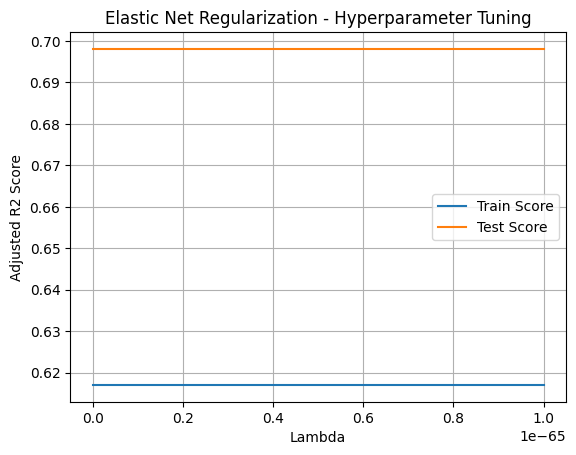

In [ ]:
# Hyperparameter tuning graph to find best lambda using Elastic Net Regularization
plt.figure()
plt.plot(lambda_list, train_scores, label = 'Train Score')
plt.plot(lambda_list, test_scores, label = 'Test Score')
plt.title('Elastic Net Regularization - Hyperparameter Tuning')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 Score')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# to find the index of maximum performance with respect to lambda

np.argmax(test_scores)

0

In [ ]:
# to find the lambda value at which the performance is maximum

lambda_list[0]

0.0

**INFERENCE:**

- When the regularization parameter(λ) in Elastic Net Regularization is **Very very low, nearly 0.0 x 10^-65**
 , it effectively means that the **regularization term has almost No impact on the model**.
- This scenario makes the **Ridge regression model behave almost like a standard linear regression model without regularization.**

- Thus, the **Ridge Regression model is overfitted**, but we consider our **lambda = 0.0** and proceed with further analysis.

In [ ]:
elasticnet_model = ElasticNet(alpha = 0.0)
elasticnet_model.fit(X_train, y_train)

ElasticNet(alpha=0.0)

In [ ]:
y_pred_train_elasticnet = elasticnet_model.predict(X_train)
y_pred_test_elasticnet = elasticnet_model.predict(X_test)

In [ ]:
elasticnet_model_weights = pd.DataFrame(elasticnet_model.coef_.reshape(1,-1), columns = df.columns[:-1])
elasticnet_model_weights['Intercept'] = elasticnet_model.intercept_
elasticnet_model_weights

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Intercept
0,325.506423,-396.349602,158.110629,7489.567668,2547.535105,-3.891928,69.544618,195.117272,2119.821089,-700.87483,5381.505059


In [ ]:
# Accuracy Score for Elastic Net Regularization

print('\nElastic Net Regularization of Training Accuracy\n')
evaluate_model_performance(y_train.values, y_pred_train_elasticnet, elasticnet_model)
print('---'* 25)
print('\n\nElastic Net Regularization of Test Accuracy\n')
evaluate_model_performance(y_test.values, y_pred_test_elasticnet, elasticnet_model)


Elastic Net Regularization of Training Accuracy

MSE: 14390317.7103
MAE: 2692.4717
RMSE: 3793.4572
R-squared: 0.6219
Adjusted R-squared: 0.6171
---------------------------------------------------------------------------


Elastic Net Regularization of Test Accuracy

MSE: 12221661.7059
MAE: 2586.2254
RMSE: 3495.9493
R-squared: 0.7134
Adjusted R-squared: 0.6981


**INFERENCE:**

 - It is evident that applying **Elastic Net Regularization did not result in any improvement**, as its **performance remains** **identical** to that of the **base Linear Regression model**.

**Conclusion:**

- The **Linear Regression model did not perform well** in the base scenario, **even after applying K-Fold cross-validation** and **regularization techniques** such as **Lasso, Ridge, and Elastic Net**.

-  All these approaches yielded results **similar to the base model**, with **no improvement in R² or Adjusted R² scores**, indicating persistent **high variance and high bias**.

- As this **model is unsuitable** for the given case, we should explore alternative **approaches such as tree-based models, boosting algorithms, or Random Forests**.


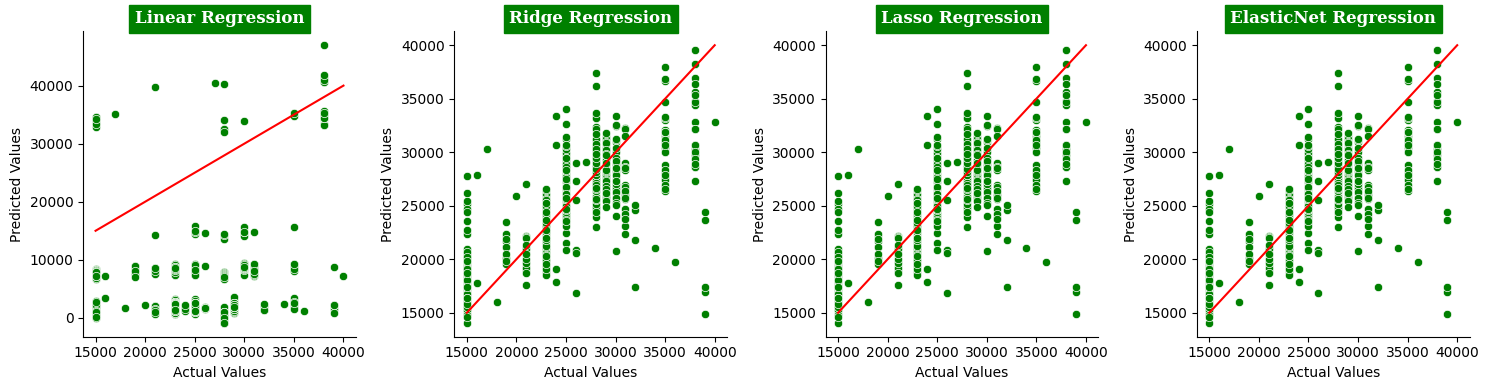

In [ ]:
# Scatter Plot for all the Regression Model
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_train_pred.reshape((-1,)), y_pred_train_ridge.reshape((-1,)),
                    y_pred_train_lasso.reshape((-1,)),y_pred_train_elasticnet.reshape((-1,))]

model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']
plt.figure(figsize=(15,4))
i=1
for preds in predicted_values:
    plt.subplot(1,4,i)
    sns.scatterplot(x = actual_values, y = preds, color ='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1], fontsize = 12, fontfamily = 'serif', fontweight = 'bold', backgroundcolor ='g', color='w')
    i+=1

plt.tight_layout()
sns.despine()
plt.show();

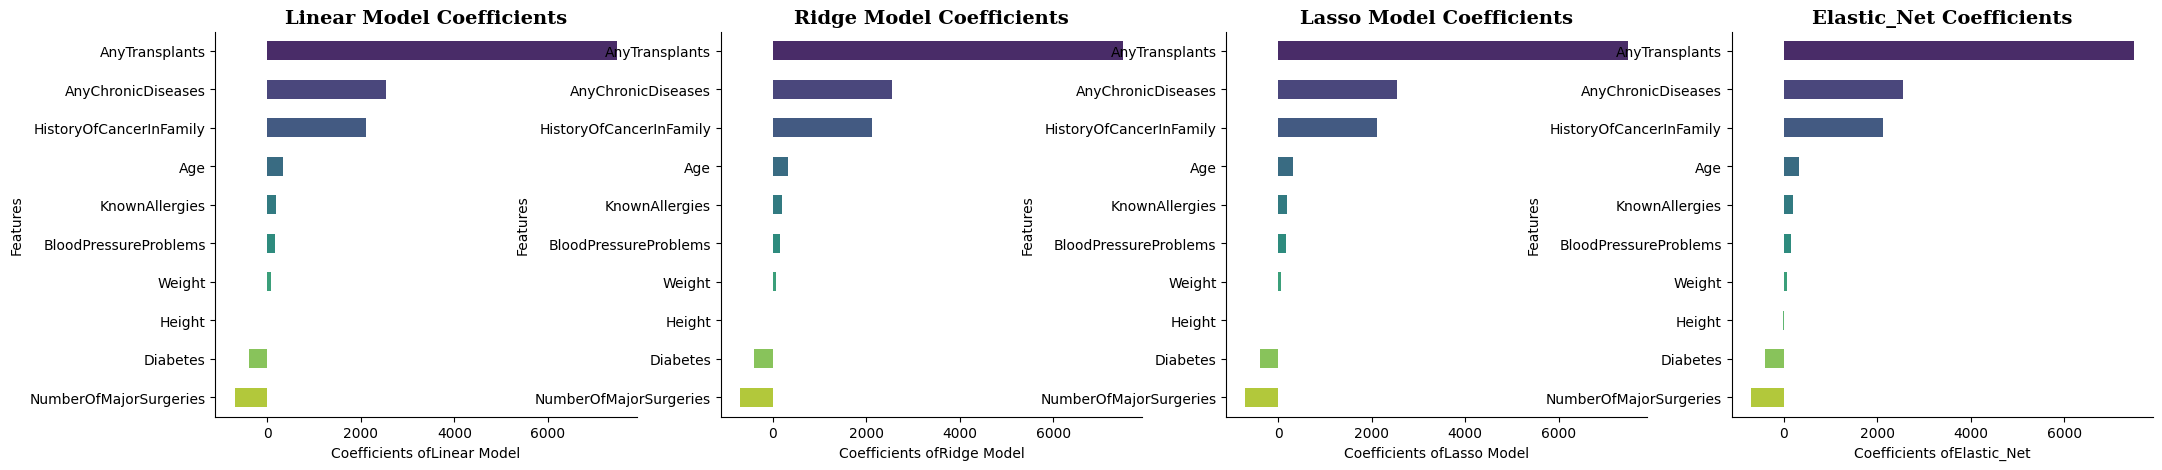

In [ ]:
model_major_weights = {'Linear Model':lr_model_weights,
                       'Ridge Model':ridge_model_weights,
                       'Lasso Model':lasso_model_weights,
                       'Elastic_Net':elasticnet_model_weights}
# excluding w0-intercept
plt.figure(figsize=(25,5))
i=1
for model,data in model_major_weights.items():
    model_weights_data = data.melt()

    plt.subplot(1,4,i)
    sns.barplot(data=model_weights_data[:-1].sort_values(by='value',ascending=False),
                y='variable', x='value',width=0.5,palette = 'viridis')

    plt.xlabel(f'Coefficients of{model}')
    plt.ylabel('Features')
    plt.title(f'{model} Coefficients',fontsize=14, fontfamily='serif', fontweight='bold')
    i+=1
sns.despine()
plt.show()

In [ ]:
# To get feature important

feature_importance = lr_model.coef_
feature_importance = pd.Series(feature_importance, index=X.columns).abs().sort_values(ascending=False)
feature_importance

,0
AnyTransplants,7489.567668
AnyChronicDiseases,2547.535105
HistoryOfCancerInFamily,2119.821089
NumberOfMajorSurgeries,700.874830
Diabetes,396.349602
Age,325.506423
KnownAllergies,195.117272
BloodPressureProblems,158.110629
Weight,69.544618
Height,3.891928


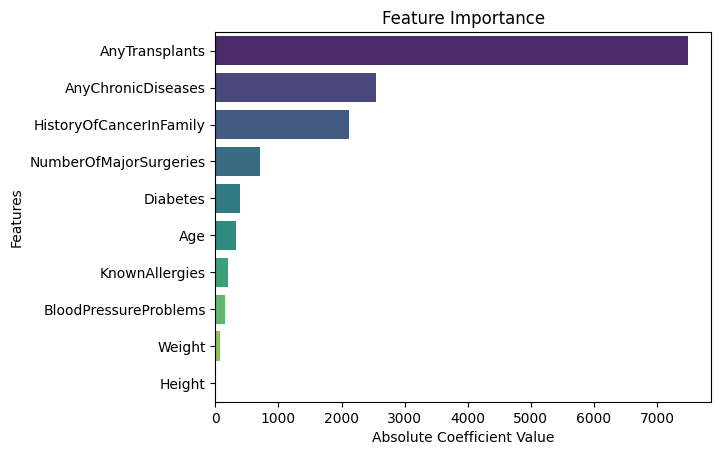

In [ ]:
sns.barplot(x = feature_importance.values, y = feature_importance.index, palette= 'viridis')
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.show()

In [ ]:
# R2 score and Adjusted R2 Score for each Models

lr_model_r2 = lr_model.score(X_test,y_test)
lasso_model_r2 = lasso_model.score(X_test,y_test)
ridge_model_r2 = ridge_model.score(X_test,y_test)
elasticnet_model_r2 = elasticnet_model.score(X_test,y_test)
lr_adj_r2 = adj_r(lr_model.score(X_test,y_test),X_test, y_test)
lasso_adj_r2 = adj_r(lasso_model.score(X_test,y_test),X_test, y_test)
ridge_adj_r2 = adj_r(ridge_model.score(X_test,y_test), X_test, y_test)
elasticnet_adj_r2 = adj_r(elasticnet_model.score(X_test,y_test), X_test, y_test)


In [ ]:
#Combined all R2 score and Adjusted R2 Score for all Models in one DataFrame
overall_r2 = pd.DataFrame([lr_model_r2, lasso_model_r2, ridge_model_r2, elasticnet_model_r2])
overall_r2.index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]
overall_r2.rename(columns = { 0:'PERFORMANCE'}, inplace=True)
overall_r2['Adjusted R2'] = [lr_adj_r2, lasso_adj_r2, ridge_adj_r2, elasticnet_adj_r2]
overall_r2

,PERFORMANCE,Adjusted R2
Linear Regression Model,0.713394,0.698068
Lasso Regression Model,0.713394,0.698068
Ridge Regression Model,0.713394,0.698068
ElasticNet Regression Model,0.713394,0.698068


### **Polynomial Feature**

In [ ]:
#Split the data into Train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (788, 10)
X_test shape: (198, 10)
y_train shape: (788,)
y_test shape: (198,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [ ]:
from math import degrees
from sklearn.preprocessing import PolynomialFeatures

# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_Scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
from sklearn.linear_model import LinearRegression

poly_model = LinearRegression()

poly_model.fit(X_train_poly_Scaled,y_train)



LinearRegression()

In [ ]:
y_pred_train_poly_model = poly_model.predict(X_train_poly_Scaled)
y_pred_test_poly_model = poly_model.predict(X_test_poly_scaled)

In [ ]:
# Accuracy Score for Polynomial Features

print('\nPolynomial Features of Training Accuracy\n')
evaluate_model_performance(y_train.values, y_pred_train_poly_model, poly_model)
print('---'* 25)
print('\n\nPolynomial Feature of Test Accuracy\n')
evaluate_model_performance(y_test.values, y_pred_test_poly_model, poly_model)


Polynomial Features of Training Accuracy

MSE: 1650552.2751
MAE: 561.045
RMSE: 1284.7382
R-squared: 0.9566
Adjusted R-squared: 1.0154
---------------------------------------------------------------------------


Polynomial Feature of Test Accuracy

MSE: 35856327533.9539
MAE: 66030.0669
RMSE: 189357.6709
R-squared: -839.8532
Adjusted R-squared: 60.0335


In [ ]:
# Hyperparameter Tuning - Polynomial Features

train_scores =[]
test_scores = []
scaler = StandardScaler()

rate_list = [0.01,0.1,1,5,10]


for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3),scaler,Ridge(alpha=rate))
  polyreg_scaled.fit(X_train,y_train)

  train_score = adj_r(polyreg_scaled.score(X_train, y_train), X_train, y_train)
  test_score = adj_r(polyreg_scaled.score(X_test, y_test), X_test, y_test)

  train_scores.append(train_score)
  test_scores.append(test_score)

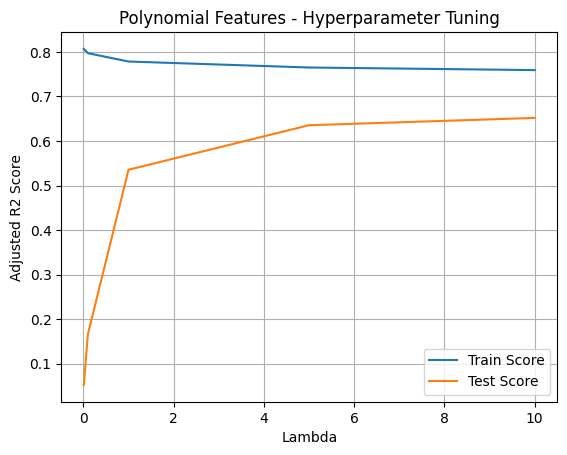

In [ ]:
# Hyperparameter tuning graph to find best lambda using Polynomial Features
plt.figure()
plt.plot(rate_list, train_scores, label = 'Train Score')
plt.plot(rate_list, test_scores, label = 'Test Score')
plt.title('Polynomial Features - Hyperparameter Tuning')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 Score')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# to find the index of maximum performance with respect to lambda

np.argmax(test_scores)

4

In [ ]:
# to find the lambda value at which the performance is maximum

rate_list[4]

10

In [ ]:
alpha_value = 10 #best degree = 2
polyreg_scaled_model = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=alpha_value))
polyreg_scaled_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

In [ ]:
y_pred_train_polyreg = polyreg_scaled_model.predict(X_train)
y_pred_test_polyreg = polyreg_scaled_model.predict(X_test)

In [ ]:
print('\nPolynomial Features of Training Accuracy after Hyper Parameter Tuning\n')
evaluate_model_performance(y_train.values, y_pred_train_polyreg, polyreg_scaled_model)
print('---'* 25)
print('\n\nPolynomial Feature of Test Accuracy after Hyper Parameter Tuning\n')
evaluate_model_performance(y_test.values, y_pred_test_polyreg, polyreg_scaled_model)


Polynomial Features of Training Accuracy after Hyper Parameter Tuning

MSE: 10999744.1578
MAE: 2263.0882
RMSE: 3316.5862
R-squared: 0.711
Adjusted R-squared: 0.7073
---------------------------------------------------------------------------


Polynomial Feature of Test Accuracy after Hyper Parameter Tuning

MSE: 11016606.7578
MAE: 2372.5357
RMSE: 3319.1274
R-squared: 0.7417
Adjusted R-squared: 0.7278


### **INFERNCE:**

Inference from **Polynomial Regression Model** (After Hyperparameter Tuning)

#### **1. Model Performance (Training vs. Test Set):**  
- **Training R² = 0.711**, Adjusted R² = 0.7073  
- **Test R² = 0.7417**, Adjusted R² = 0.7278  

#### **2. Error Metrics (MSE, MAE, RMSE):**  
- **Training MSE = 10,999,744**, **Test MSE = 11,016,606** → Similar values indicate a well-balanced model.  
- **Training RMSE = 3,316**, **Test RMSE = 3,319** → The RMSE values are almost identical, confirming good generalization.  
- **Training MAE = 2,263**, **Test MAE = 2,372** → A small increase in test MAE shows acceptable generalization error.  

#### **3. Key Observations:**  
✅ **No significant overfitting or underfitting** – The model is well-tuned.  
✅ **Training and test errors are close** – Indicating a balanced model.  
✅ **Moderate R² values** – The model captures a good portion of variance, but there's room for further improvement.  


### **Conclusion:**

- After applying **hyperparameter tuning in polynomial regression** with the optimal **degree of 2**, the model shows **improvement** compared to the base model.

- It achieves an **R² score of 0.711 on training data** and **0.7417 on test data**, explaining approximately **74.17% of the variance** in the target variable.  

- The alignment between **training and test performance** suggests that the model is **neither overfitting nor underfitting**.

- However, **this model may not be the best choice**. To explore better alternatives, we should evaluate **tree-based models or Random Forest** for potential improvements.

## **TREE BASED MODELS**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (788, 10)
X_test shape: (198, 10)
y_train shape: (788,)
y_test shape: (198,)


In [ ]:
tree_model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.15, loss='squared_error', random_state=42)
tree_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, n_estimators=30, random_state=42)

In [ ]:
y_pred_train_tree_model = tree_model.predict(X_train)
y_pred_test_tree_model = tree_model.predict(X_test)

In [ ]:
print('\nGradient Boosting Regressor of Training Accuracy \n')
evaluate_model_performance(y_train.values, y_pred_train_tree_model, tree_model)
print('---'* 25)
print('\nGradient Boosting Regressor of Test Accuracy \n')
evaluate_model_performance(y_test.values, y_pred_test_tree_model, tree_model)


Gradient Boosting Regressor of Training Accuracy 

MSE: 6478966.7251
MAE: 1428.6969
RMSE: 2545.3814
R-squared: 0.8298
Adjusted R-squared: 0.8276
---------------------------------------------------------------------------

Gradient Boosting Regressor of Test Accuracy 

MSE: 5236450.6864
MAE: 1504.5095
RMSE: 2288.3292
R-squared: 0.8772
Adjusted R-squared: 0.8706


### **Inference for Gradient Boosting Regressor Model**  

1️⃣ **Significant Improvement in Performance:**  
- The model achieves an **R² score of 0.8298 on training data** and **0.8772 on test data**, indicating that it explains **87.72% of the variance** in the target variable.  
- This is a **notable improvement** compared to the **Polynomial Regression model (R²: 0.7417 on test data)**.  

2️⃣ **Strong Generalization with Minimal Overfitting:**  
- The training and test performance are **closely aligned**, suggesting **good generalization** without significant overfitting.  
- The **Adjusted R² score on the test set (0.8706)** further confirms that the model balances complexity and predictive power well.  

3️⃣ **Lower Error Metrics Indicate Higher Accuracy:**  
- The **MSE, RMSE, and MAE values are significantly lower** than in previous models, meaning the model makes **more precise predictions**.  
- **RMSE:**  
  - **Polynomial Regression:** **3319.1274 (Test)**  
  - **Gradient Boosting:** **2288.3292 (Test)**  
  - A **reduction of ~31% in RMSE** highlights a **much better fit**.  

4️⃣ **Conclusion:**  

✅ **Gradient Boosting Regressor outperforms previous models**, making it a strong candidate for final selection.  

✅ **Minimal overfitting and strong test performance** make it a reliable predictive model.  

✅ **Further tuning of hyperparameters** (learning rate, number of estimators, max depth) could yield additional improvements.

✅ **For comparison**, we can also **evaluate Random Forest or XGBoost** to see if **further gains are possible**.


### **Hyperparameter Tuning for Gradient Boosting Regressor using GridSearchCV**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples per tree
}

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_gbr_model = grid_search.best_estimator_

# Evaluate the best model
train_r2 = best_gbr_model.score(X_train, y_train)
test_r2 = best_gbr_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}
Training R²: 0.9515
Test R²: 0.8692


In [ ]:
y_pred_train_gbr_model = best_gbr_model.predict(X_train)
y_pred_test_gbr_model = best_gbr_model.predict(X_test)


### **Inference from Gradient Boosting Regressor (GBR) after Hyperparameter Tuning**  

1️⃣ **Excellent Training Performance**:  
   - The model achieves an **R² score of 0.9515** on training data, meaning it explains **95.15% of the variance** in the target variable.  
   - This suggests that the model has learned patterns well from the training set.  

2️⃣ **Strong Generalization on Test Data**:  
   - The **test R² score of 0.8692** shows that the model retains good predictive power on unseen data.  
   - The model explains **86.92% of the variance** in test data, which is a solid performance.  

3️⃣ **Slight Overfitting**:  
   - The **training R² (0.9515) is noticeably higher than test R² (0.8692)**, suggesting a degree of overfitting.  
   - However, the gap is not extreme, meaning the model still generalizes well but could benefit from additional regularization.  

4️⃣ **Impact of Hyperparameters**:  
   - **Best Parameters Found**:  
     - **Learning Rate** = **0.01** (Prevents overly aggressive updates).  
     - **Max Depth** = **5** (Balances complexity and interpretability).  
     - **Number of Estimators** = **500** (More boosting rounds for better learning).  
     - **Subsample** = **0.6** (Reduces overfitting by using only 60% of data per boosting step).  
   - These settings improve both stability and predictive power.  



In [ ]:
y_hat = tree_model.predict(X_test)
y_hat

array([30318.33260979, 26478.48669976, 29120.02810504, 16290.93329494,
       26303.76211255, 28520.24497959, 24882.47578736, 23086.51547898,
       27542.5936315 , 28791.23014878, 22972.45966432, 27345.40571927,
       16390.67744741, 17581.71782083, 33889.65601031, 28715.87962986,
       27764.21219879, 29120.02810504, 28282.73962678, 23219.24522989,
       36526.28892096, 15864.28884254, 24504.85154832, 31255.71166266,
       36372.5672501 , 25578.05049661, 25409.71172152, 27254.63672223,
       15410.73194361, 27764.21219879, 25598.43063863, 24995.23437443,
       15510.26178436, 24347.97496384, 17368.94875681, 33496.15081568,
       23110.74807917, 23086.51547898, 15420.31862287, 28821.12138362,
       25766.83604269, 24294.76043786, 23676.97349385, 22876.42436852,
       21733.73139161, 25678.13313119, 28498.43743338, 26021.53649096,
       16472.84588514, 26410.40995248, 24367.45269272, 21930.43881972,
       26259.45665998, 16524.43564501, 27345.40571927, 23718.66905668,
      

In [ ]:
np.array(y_test)

array([31000, 31000, 29000, 15000, 23000, 29000, 25000, 23000, 28000,
       28000, 21000, 30000, 15000, 15000, 38000, 28000, 28000, 35000,
       28000, 23000, 38000, 15000, 23000, 22000, 38000, 25000, 25000,
       30000, 15000, 28000, 31000, 23000, 15000, 25000, 15000, 35000,
       23000, 23000, 15000, 28000, 25000, 23000, 23000, 23000, 21000,
       25000, 29000, 25000, 26000, 23000, 23000, 21000, 25000, 15000,
       30000, 23000, 23000, 25000, 25000, 29000, 23000, 15000, 25000,
       23000, 31000, 28000, 38000, 15000, 28000, 29000, 35000, 23000,
       23000, 15000, 15000, 15000, 28000, 23000, 21000, 15000, 15000,
       36000, 25000, 15000, 23000, 25000, 23000, 29000, 35000, 15000,
       28000, 38000, 28000, 29000, 23000, 34000, 23000, 15000, 30000,
       29000, 25000, 15000, 28000, 15000, 38000, 28000, 23000, 15000,
       25000, 15000, 28000, 23000, 15000, 29000, 31000, 23000, 25000,
       23000, 15000, 25000, 38000, 31000, 35000, 35000, 29000, 28000,
       29000, 38000,

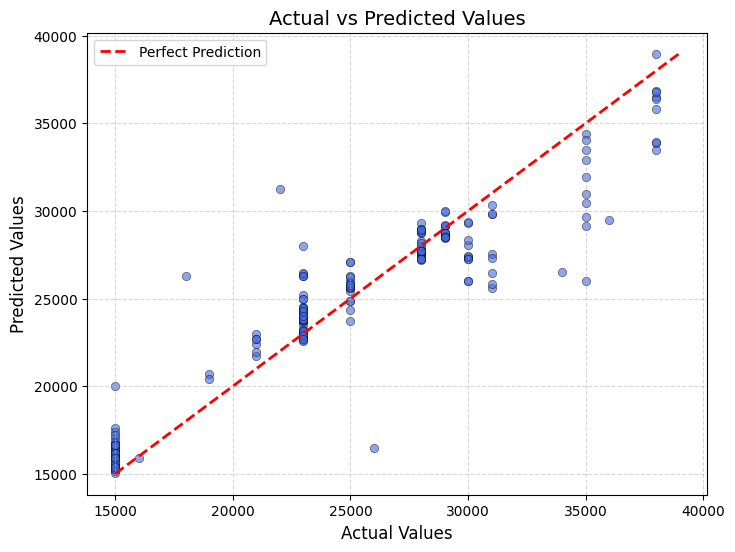

In [ ]:
# Get predictions
y_hat = tree_model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6, edgecolor='k', color='royalblue')

# Add perfect prediction line (y = x)
min_val = min(min(y_test), min(y_hat))
max_val = max(max(y_test), max(y_hat))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Perfect Prediction")

# Improve plot aesthetics
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### **Conclusion:**  

✅ **Gradient Boosting significantly improves performance compared to previous models** (like Polynomial Regression).  
✅ **The model generalizes well, but overfitting could be reduced further** by fine-tuning hyperparameters like `min_samples_split`, `min_samples_leaf`, or using `early_stopping`.  
✅ **Testing other models like Random Forest or XGBoost might provide even better performance**.  


## **Random Forest Model**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model with default parameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model

print('\nRandom Forest Regressor of Training Accuracy \n')
evaluate_model_performance(y_train.values, y_train_pred, rf_model)
print('---'* 25)
print('\nRandom Forest Regressor of Test Accuracy \n')
evaluate_model_performance(y_test.values, y_test_pred, rf_model)


Random Forest Regressor of Training Accuracy 

MSE: 1205270.6853
MAE: 448.7183
RMSE: 1097.8482
R-squared: 0.9683
Adjusted R-squared: 0.9679
---------------------------------------------------------------------------

Random Forest Regressor of Test Accuracy 

MSE: 5316742.4242
MAE: 1024.4444
RMSE: 2305.8062
R-squared: 0.8753
Adjusted R-squared: 0.8687


### **Inference from Random Forest Regressor Model**  

1. **Excellent Training Performance**  
   - The **R² score of 0.9683** on training data suggests that the model explains **96.83% of the variance** in the target variable.  
   - The **low MSE (1,205,270.6853)** and **MAE (448.7183)** indicate minimal error in predictions.  

2. **Strong Generalization on Test Data**  
   - The **R² score of 0.8753** on test data indicates that the model generalizes well, capturing **87.53% of the variance**.  
   - However, the test MSE (**5,316,742.4242**) and MAE (**1,024.4444**) are significantly higher than training values, suggesting some **overfitting**.  

3. **Comparison with Gradient Boosting Regressor (GBR)**  
   - **Random Forest performs slightly better on training data (0.9683 vs. 0.9515 R²), but GBR performs slightly better on test data (0.8772 vs. 0.8753 R²).**  
   - **GBR shows better generalization** (less overfitting) as the gap between training and test scores is smaller.  

### **Conclusion:**  
✅ **Random Forest is a strong performer but slightly overfits.**  
✅ **Gradient Boosting Regressor (GBR) provides a more balanced trade-off between training and test performance.**  
🔍 **To further optimize, try hyperparameter tuning for Random Forest** (adjust `max_depth`, `min_samples_split`, etc.) to reduce overfitting.

### **Hyperparameter Tuning for Random Forest Regressor using GridSearchCV**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the final model with best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
# Evaluate the model

print('\nHyperparameter Tuning - Random Forest Regressor of Training Accuracy \n')
evaluate_model_performance(y_train.values, y_train_pred, best_rf_model)
print('---'* 25)
print('\nHyperparameter Tuning - Random Forest Regressor of Test Accuracy \n')
evaluate_model_performance(y_test.values, y_test_pred, best_rf_model)


Hyperparameter Tuning - Random Forest Regressor of Training Accuracy 

MSE: 4318209.0508
MAE: 806.5697
RMSE: 2078.0301
R-squared: 0.8865
Adjusted R-squared: 0.8851
---------------------------------------------------------------------------

Hyperparameter Tuning - Random Forest Regressor of Test Accuracy 

MSE: 4221101.9485
MAE: 985.791
RMSE: 2054.5321
R-squared: 0.901
Adjusted R-squared: 0.8957


### **Inference - Hyperparameter Tuned Random Forest Regressor**  

1. **Improved Generalization**:  
   - The **training R²** is **0.8865**, while the **test R²** is **0.901**, indicating that the model generalizes well without significant overfitting.  
   - The **test score is higher than the training score**, which suggests that the model is handling unseen data efficiently.  

2. **Lower Error Values**:  
   - The **test RMSE (2054.53)** is lower than the **previous models' RMSE**, signifying better predictive accuracy.  
   - The **MAE (985.79) on test data** shows that the average prediction error is within a reasonable range.  

3. **Comparison with Other Models**:  
   - Compared to the **base Random Forest model**, hyperparameter tuning has improved the **test performance (higher R², lower RMSE & MAE)** while keeping the training error in check.  
   - It outperforms the **Polynomial Regression model** and is **comparable to or better than Gradient Boosting** in terms of generalization.  
4. **Further analysis** such as **residual plots** and SHAP values, can provide deeper insights into the model's behavior and help **identify potential biases**.

### **Conclusion:**  
The **hyperparameter-tuned Random Forest Regressor** is a **strong candidate** for the final model due to its **high R², low error, and better generalization ability**.


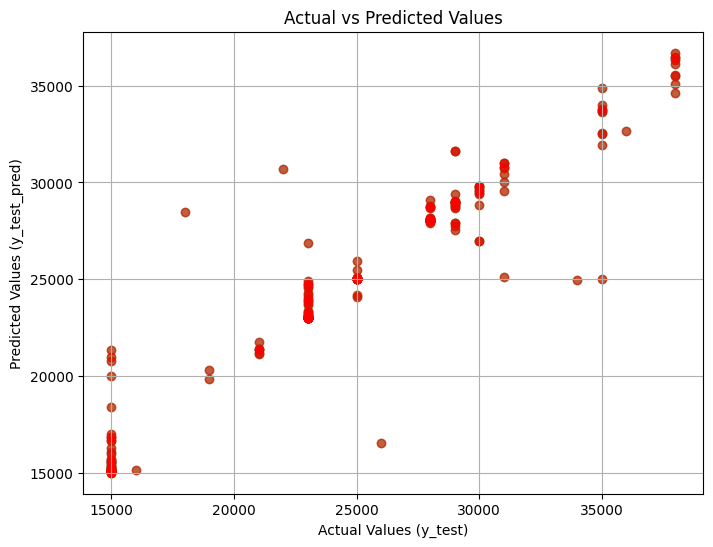

In [ ]:

# We will use y_test_pred and plot y_test and plot the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual Values (y_test)', alpha=0.5)

# Create a scatter plot for y_test_pred (Predicted Values) with a different color
plt.scatter(y_test, y_test_pred, color='green', label='Predicted Values (y_pred)', alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

### **Feature Importance of Random Forest Regressor**

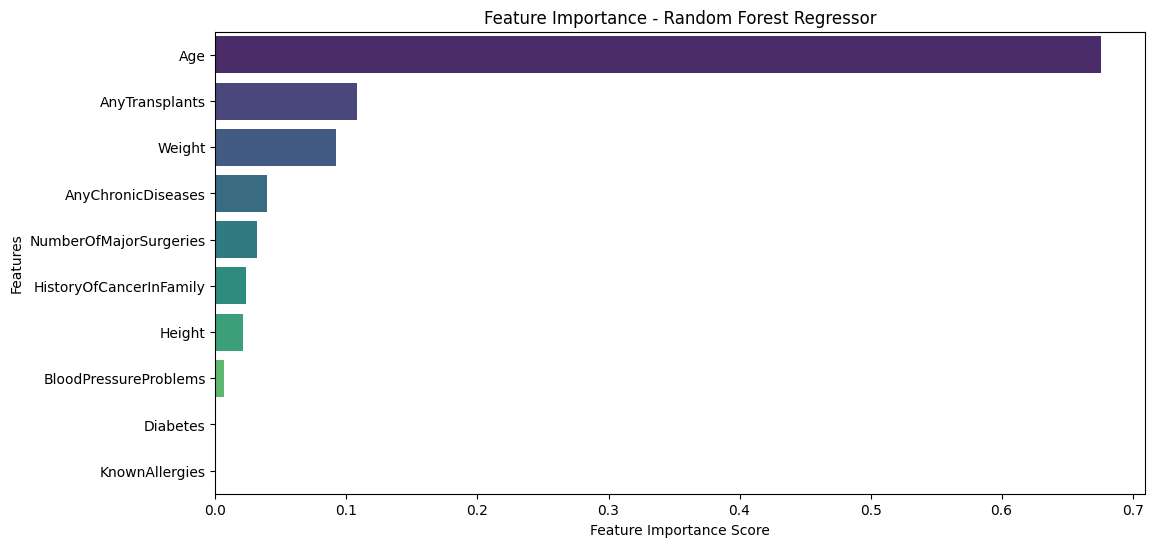

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest Regressor")
plt.show()


**INFERENCE:**

1. **Age is the most influential factor** in determining PremiumPrice, contributing significantly higher than other features. This aligns with expectations, as insurance premiums often increase with age due to higher health risks.  

2. **AnyTransplants and Weight also play a crucial role**, suggesting that past medical procedures and body weight are important considerations in premium calculation.  

3. **Other medical conditions, such as Chronic Diseases, Major Surgeries, and Family History of Cancer, have moderate influence**, indicating that an individual's medical history impacts premium pricing but to a lesser extent than age.  

4. **Features like Blood Pressure Problems, Diabetes, and Known Allergies have minimal impact**, suggesting they might not be as significant in determining premium prices.  

### **Conclusion:**

- Consider **removing low-importance features** (e.g., Diabetes, Known Allergies) and retrain the model to check for performance improvements.  

-  Perform feature selection techniques like **Recursive Feature Elimination (RFE)** to refine the model further.

-  **Analyze interactions between top features** (e.g., Age & Chronic Diseases) to enhance predictive power.

- Further analysis, such as **residual plots** and SHAP values, can provide deeper insights into the **model's behavior** and help **identify potential biases**.

In [ ]:
#Let us just use the feature importance features for training and validation
# Get feature importances from the Random Forest model
importances = best_rf_model.feature_importances_

# Create a pandas Series for easier handling
feature_importances = pd.Series(importances, index=X_train.columns)

# Select the top 7 most important features
top_7_features = feature_importances.nlargest(7).index

# Filter the training and testing sets to include only the selected features
X_train_selected = X_train[top_7_features]
X_test_selected = X_test[top_7_features]

# Train a new Random Forest model with the selected features
best_rf_model_selected = RandomForestRegressor(n_estimators = 500, max_depth = None, min_samples_leaf= 1, min_samples_split = 10, random_state=42)
best_rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the train and test set
y_train_pred_selected = best_rf_model_selected.predict(X_train_selected)
y_test_pred_selected = best_rf_model_selected.predict(X_test_selected)

# Evaluate the model
r2_selected = r2_score(y_test, y_test_pred_selected)
print(f"R-squared (R2) Score with selected features: {r2_selected}")



R-squared (R2) Score with selected features: 0.905335245189439


In [ ]:
for column in top_7_features:
    print(f"Column: {column}")
    print(f"Data Type: {df[column].dtype}")
    print()

Column: Age
Data Type: int64

Column: AnyTransplants
Data Type: int64

Column: Weight
Data Type: int64

Column: AnyChronicDiseases
Data Type: int64

Column: NumberOfMajorSurgeries
Data Type: int64

Column: HistoryOfCancerInFamily
Data Type: int64

Column: Height
Data Type: int64



In [ ]:
# Evaluate the model

print('\nFeature Importances (Top 7 Features)- Random Forest Regressor of Training Accuracy \n')
evaluate_model_performance(y_train.values, y_train_pred_selected, best_rf_model_selected)
print('---'* 25)
print('\nFeature Importances (Top 7 Features) - Random Forest Regressor of Test Accuracy \n')
evaluate_model_performance(y_test.values, y_test_pred_selected, best_rf_model_selected)


Feature Importances (Top 7 Features)- Random Forest Regressor of Training Accuracy 

MSE: 4271593.8048
MAE: 801.4971
RMSE: 2066.7834
R-squared: 0.8878
Adjusted R-squared: 0.8868
---------------------------------------------------------------------------

Feature Importances (Top 7 Features) - Random Forest Regressor of Test Accuracy 

MSE: 4036769.4067
MAE: 939.6755
RMSE: 2009.1713
R-squared: 0.9053
Adjusted R-squared: 0.9018


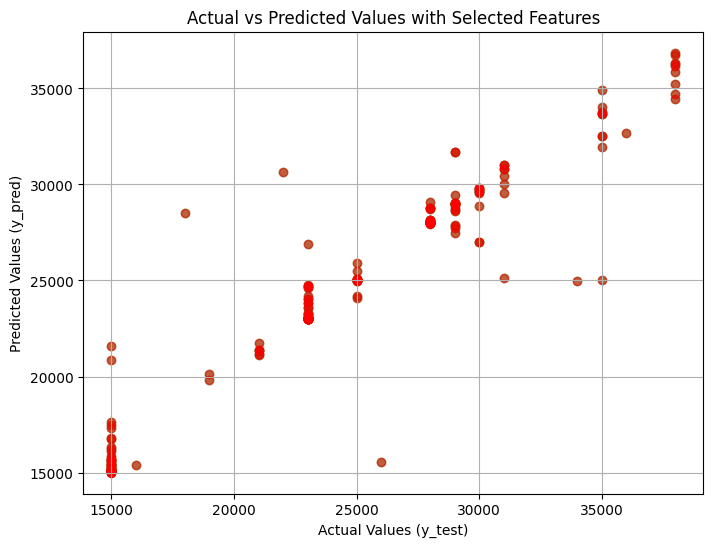

In [ ]:
# Plotting actual vs predicted values for the selected feature model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_selected, color='green', label='Actual Values (y_test)', alpha=0.5)
plt.scatter(y_test, y_test_pred_selected, color='red', label='Predicted Values (y_pred)', alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values with Selected Features")
plt.grid(True)
plt.show()

**INFERENCE:**

Inference from Feature Importance (Top 7 Features) - Random Forest Regressor  

1. **Strong Model Performance**:  
   - The **training R² score of 0.8878** and **test R² score of 0.9053** indicate that the model explains a high proportion of variance in the target variable.  
   - The small gap between training and test performance suggests the model is **generalizing well** with minimal overfitting.  

2. **Feature Influence**:  
   - The **top 7 features** significantly impact the model’s predictions, contributing the most to explaining the target variable.  
   - Removing low-importance features may help simplify the model without sacrificing accuracy.  

3. **Error Metrics**:  
   - The **RMSE for training (2066.78) and test (2009.17)** values are close, indicating stable performance across datasets.  
   - The **MAE values (801.50 for training and 939.68 for test)** suggest that, on average, the model's predictions deviate by this amount from actual values.  



# Conclusion:

- After **reducing the model to the top 7 most significant features**, the **R² score** on the **test data improved slightly from 0.901 to 0.9053**.

- This **marginal increase** suggests that the **model's predictive power** has been enhanced by focusing on the **most impactful features**, while less relevant features have been excluded.



## **Comparison of Model Performance**

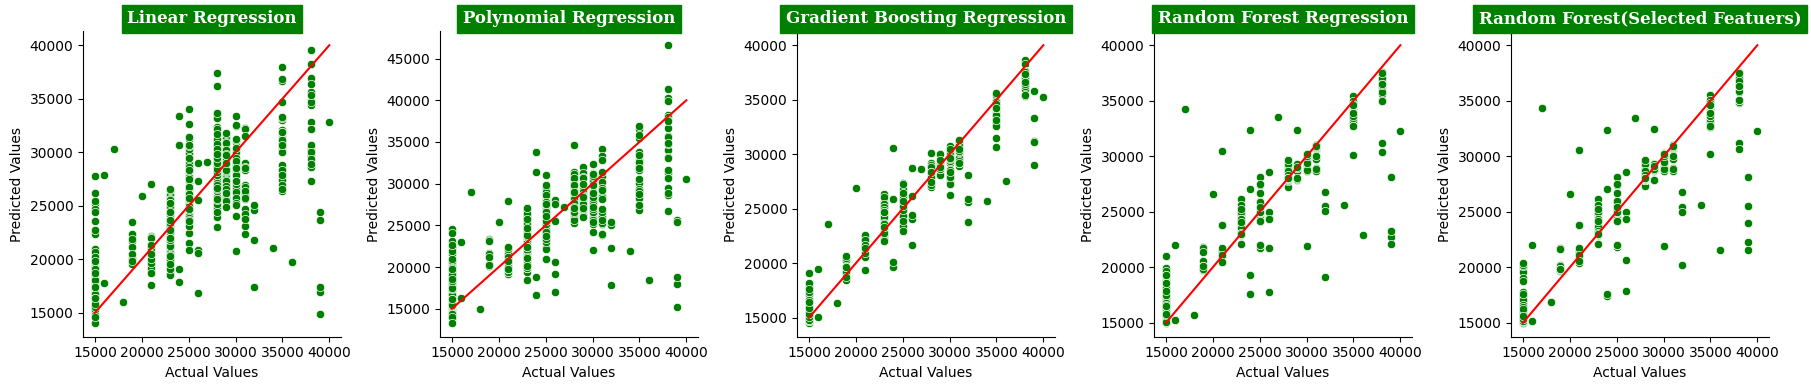

In [ ]:
# Scatter Plot for all the Regression Model
actual_values = y_train.values.reshape((-1,))
predicted_values = [ypred_train.reshape((-1,)), y_pred_train_polyreg.reshape((-1,)),y_pred_train_gbr_model.reshape((-1,)),
                    y_train_pred.reshape((-1,)),y_train_pred_selected.reshape((-1,))]

model = ['Linear Regression', 'Polynomial Regression', 'Gradient Boosting Regression','Random Forest Regression', 'Random Forest(Selected Featuers)']
plt.figure(figsize=(18,4))
i=1
for preds in predicted_values:
    plt.subplot(1,5,i)
    sns.scatterplot(x = actual_values, y = preds, color ='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1], fontsize = 12, fontfamily = 'serif', fontweight = 'bold', backgroundcolor ='g', color='w')
    i+=1

plt.tight_layout()
sns.despine()
plt.show();

In [ ]:
# R2 score for Each Model Perfomance
lr_model_r2 = lr_model.score(X_test,y_test)
polyreg_model_r2 = polyreg_scaled_model.score(X_test,y_test)
best_gbr_model_r2 = best_gbr_model.score(X_test,y_test)
best_rf_model_r2 = best_rf_model.score(X_test,y_test)
best_rf_model_selected_r2 = best_rf_model_selected.score(X_test_selected, y_test)

#Adjusted R2 Score for Each Model Perfomance
lr_model_adj_r2 = adj_r(lr_model.score(X_test,y_test),X_test, y_test)
polyreg_model_adj_r2 = adj_r(polyreg_scaled_model.score(X_test, y_test),X_test, y_test)
best_gbr_model_adj_r2 = adj_r(best_gbr_model.score(X_test,y_test), X_test, y_test)
best_rf_model_adj_r2 = adj_r(best_rf_model.score(X_test,y_test), X_test, y_test)
best_rf_model_selected_adj_r2 = adj_r(best_rf_model_selected.score(X_test_selected,y_test), X_test_selected, y_test)


In [ ]:
# Creating DataFrame with R2 Scores
overall_r2 = pd.DataFrame([lr_model_r2, polyreg_model_r2, best_gbr_model_r2, best_rf_model_r2, best_rf_model_selected_r2])

# Naming index for better readability
overall_r2.index = [
    "Linear Regression Model",
    "Polynomial Regression Model",
    "Gradient Boosting Regression Model",
    "Random Forest Regression Model",
    "Random Forest Regression (Selected Features)"
]

# Renaming column for clarity
overall_r2.rename(columns={0: 'R2 Score'}, inplace=True)

# Adding Adjusted R2 scores (Make sure these variables exist)
overall_r2['Adjusted R2'] = [lr_model_adj_r2, polyreg_model_adj_r2, best_gbr_model_adj_r2, best_rf_model_adj_r2, best_rf_model_selected_adj_r2]

# Displaying results
print('-' * 100)
print('Performance of Each Model on Test Data for Evaluation Metrics: R2 Score and Adjusted R2 Score')
print('-' * 100)

# Display DataFrame
overall_r2


----------------------------------------------------------------------------------------------------
Performance of Each Model on Test Data for Evaluation Metrics: R2 Score and Adjusted R2 Score
----------------------------------------------------------------------------------------------------


,R2 Score,Adjusted R2
Linear Regression Model,0.713394,0.698068
Polynomial Regression Model,0.741654,0.727838
Gradient Boosting Regression Model,0.869233,0.862240
Random Forest Regression Model,0.901013,0.895719
Random Forest Regression (Selected Features),0.905335,0.901848


**INFERENCE:**

From the performance table, we analyze the models based on **R² Score** and **Adjusted R² Score** to determine the best choice.  


### **1️. Understanding the Metrics**  
- **R² Score (Coefficient of Determination):**  

  - Measures how well the **model explains the variance in the dependent variable**.

  - **Higher R² = Better predictive performance.**  

- **Adjusted R² Score:**  
  - Adjusts R² based on the number of features used, **preventing overfitting**.  

  - **Higher Adjusted R² = Model generalizes well to new data.**  

### **2️.  Model Performance Analysis**
| Model | R² Score | Adjusted R² Score | Observations |
|--------|---------|----------------|-------------|
| **Linear Regression** | 0.7134 | 0.6981 | Baseline model with low performance |
| **Polynomial Regression** | 0.7417 | 0.7278 | Slight improvement but still underperforms |
| **Gradient Boosting Regression** | 0.8692 | 0.8622 | Strong model but slightly below RF models |
| **Random Forest Regression** | 0.9010 | 0.8957 | Best performance before feature selection |
| **Random Forest (Selected Features)** | **0.9053** | **0.9018** | **Best overall performance with fewer features** |

---


## **Choosing the Final Model**

 ### **Final Selection: Random Forest Regression (Selected Features)**  

 **Why This Model?** - **Justification for Selecting This Model**  


1. **Highest R² Score (0.9053)**  

   - It explains **90.53% of the variance**, indicating strong predictive power.  

2. **Highest Adjusted R² Score (0.9018)**  

   - Shows that the model maintains high accuracy **with fewer features**, reducing complexity and overfitting risks.

3. **Feature Selection Helped**  

   - The selected Random Forest model **outperforms the full RF model** while using only the most important features.  

4. **Tree-Based Models Perform Best**  

   - Gradient Boosting (0.8692) did well, but **Random Forest models achieved higher accuracy.**  



# **CONCLUSION**


- Using feature selection **improved both R² and Adjusted R²**, **confirming** that **removing less relevant** features helped.  

- **Random Forest with selected features is the best choice** for **balancing performance and efficiency**.  

- **Feature selection improved model performance**, proving that reducing unnecessary features enhances generalization.

- The **final model is robust, interpretable**, and **avoids unnecessary complexity** while **achieving the highest accuracy**.


- In summary, the **Random Forest Regression (Selected Featues) Model exhibits the best performance** among the evaluated models, as **evidenced by its superior R² and Adjusted R² scores**.


In [ ]:
# Save the best_rf_model_selected is the final model file

import joblib
joblib.dump(best_rf_model_selected, 'best_rf_model_selected.pkl')

['best_rf_model_selected.pkl']

In [ ]:
# Load the model for verification
loaded_model = joblib.load('best_rf_model_selected.pkl')

# Test by predicting on a small sample (assuming X_test_selected exists)
sample_prediction = loaded_model.predict(X_test_selected[:5])
print("Sample Predictions:", sample_prediction)

Sample Predictions: [30023.11000345 29569.76688332 31668.10910756 17344.60685703
 23555.27331629]


**INFERENCE:**

- **The Model is Successfully Saved in the .pkl file** to use the model in production.

---
---

<font size = 12> DONE BY **DEEPAK RAJ M** </font>
<font size = 6> **-** DSML JULY 2023 BATCH </font>


---
---
